In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# --- Our ML tools ---
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree # This is the magic for visualizing!
import seaborn as sns

# --- Our Evaluation tools ---
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Load the Data ---
# We'll use the clean Titanic DF we made in Lesson 5
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
# Actually, let's stick to Titanic, it's more intuitive
df = sns.load_dataset('titanic')
print("--- Here's a peek at our raw data ---")
print(df.head())



--- Here's a peek at our raw data ---
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [3]:

# --- 2. Prepare the Data ---
# Let's just use the features we know are important
df_clean = df[['survived', 'pclass', 'sex', 'age', 'fare']].copy()

# Fill missing age with the median
df_clean['age'] = df_clean['age'].fillna(df_clean['age'].median())

# Now, we HAVE to handle the text, even if we don't scale
# 'sex' is the big one. Let's use One-Hot Encoding
df_clean = pd.get_dummies(df_clean, columns=['sex'], drop_first=True) # 'sex' -> 'sex_male'

print("\n--- Clean, Encoded Data ---")
print(df_clean.head())

# --- 3. Define X and y ---
X = df_clean.drop('survived', axis=1) # All columns EXCEPT our target
y = df_clean['survived']              # y is ONLY the 'survived' (0 or 1)

# --- 4. Split the Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 5. Scale the Data? ---
# Vijay: "Wait, do we need to use StandardScaler?"
# AK: "NOPE! 😄 For a Decision Tree, we can skip it! The tree
# doesn't care about the scale, just the question 'is X > 30?'"




--- Clean, Encoded Data ---
   survived  pclass   age     fare  sex_male
0         0       3  22.0   7.2500      True
1         1       1  38.0  71.2833     False
2         1       3  26.0   7.9250     False
3         1       1  35.0  53.1000     False
4         0       3  35.0   8.0500      True


In [4]:

# 1. Import (already done)
# 2. Create an "instance"
#    Let's set a 'max_depth' of 3 to stop it from overfitting!
model = DecisionTreeClassifier(max_depth=3, random_state=42)

# 3. TRAIN!
# This is where it does the "greedy" splitting to lower Gini Impurity
print("\n...Training the Decision Tree...")
model.fit(X_train, y_train) # Note: We use the *unscaled* X_train
print("...Model is Trained!...")	




...Training the Decision Tree...
...Model is Trained!...



--- Model Evaluation ---
Accuracy: 79.89%
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


--- Decision Tree Rules ---


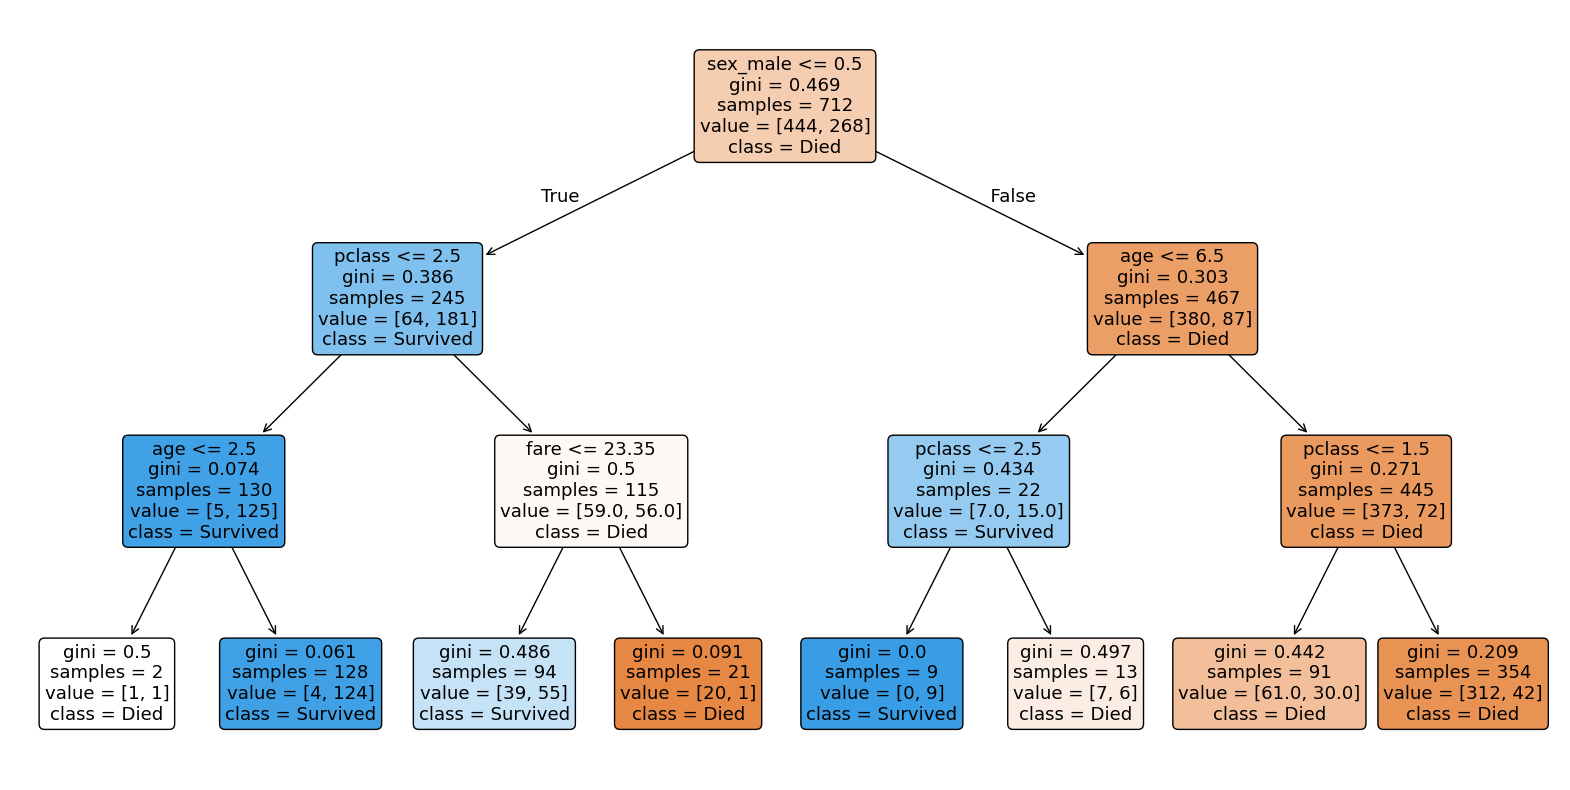

In [6]:

# 4. Predict
y_pred = model.predict(X_test)

# 5. Evaluate (Get the score!)
print("\n--- Model Evaluation ---")
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc*100:.2f}%")
print(classification_report(y_test, y_pred))

# 6. THE COOLEST PART: VISUALIZE THE TREE!
print("\n--- Decision Tree Rules ---")
plt.figure(figsize=(20, 10)) # Make the plot big
plot_tree(model, 
          feature_names=X.columns.tolist(), # Tell it the feature names
          class_names=['Died', 'Survived'], # Tell it the class names
          filled=True,                      # Color the boxes
          rounded=True)
plt.show()

